# PCA Tutorial

In an applied math class, you may be told that the principal components of a matrix are the eigenvalues of the matrix's covariance matrix. Depending on your background in statistics and linear algebra, this may or may not have meaning for you. Either way, it's worth unpacking this a bit.  

**Variance** refers to how much data points vary around their mean.  

**Covariance** is for two or more variables. It refers to how much one variable changes when another one is changed. For example, *height* and *hand size* tend to increase together (taller people have longer hands). If you think that covariance sounds a lot like correlation, you're right! Correlation is just covariance that is scaled to be between -1 and +1.  

The **covariance matrix** stores the variance and covariance values between two or more variables. It is always a square and symmetrical matrix. Let's explore one....

In [1]:
# import packages to create data and plot it
import numpy as np
import matplotlib.pyplot as plt

# create two sets of 1000 points sampled from a normal distribution

# re-write the second set to be a noisy version of the first

# Visualize the data
plt.scatter()
plt.axis('equal');

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

Compute the covariance matrix of this data using the **_np.cov()_** function.

In [2]:
# Your code here

The resulting matrix is 2x2 because we have two variables. The items on the *diagonal* (top left and bottom right) refer to the variance of each variable. (Think: why are these close to 1?) The items on the *off-diagonal* are copies of the covariance between these items. Because this is a positive value, we can see that an increase in one variable means an increase in the other.  

Now, what about the eigen-stuffs? Consider a matrix A and a vector x. Let's say Let's say that we want to find the vector x that will satisfy the following equation:

\begin{equation*}
Ax = w
\end{equation*}

We can think about matrix-vector multiplication as the matrix applying some transformation to x. Therefore, we are trying to find a vector that, when transformed, becomes the w vector. Imagine that vector w is a special case that is simply a scaled (larger or smaller) version of x. In this case, the matrix A is behaving like a scalar. We'll call that scalar.We'll call that a scalar $\lambda$.

\begin{equation*}
Ax = q = \lambda x
\end{equation*}

In this case, the vector x is called the eigenvector of matrix A, and $\lambda$ is called its eigenvalue.

The visual analogy is this: An unordered Rubik's cube represents your original matrix A. The process of rotating represents the eigenvectors, and the solved cube represents the matrix when diagonalized, or projected into the new eigenbasis.  

<img src="rubiks.png" alt="drawing" width="500"/>

Either way, you can think of the process of PCA this way: by doing an eigen decomposition of the covariance matrix of a set of data, we are finding new axes to explain the data that correspond to the dimensions of the highest correlation.

We'll start out by doing PCA by hand to build our intuition. The first step is to compute eigenvectors and eigenvalues.

In [194]:
# Compute the eigenvectors and eigenvalues of covMat
eigenValue, eigenVector = np.linalg.eig(covMat)

print(eigenValue)

[ 0.07900651  2.11568046]


You can see that the second eigenvalue is much larger than the first. These values are proportional to the amount of variance that the principal components explain. We will order our eigenvectors (the actual components) by their eigenvalues.

In [3]:
# Sort the eigenvectors
eigenVector = np.sort(, axis=1) # axis=1 sorts by column

# Plot the data and eigenvectors
plt.figure()
plt.scatter(,alpha=0.5) # alpha controls the transparency of the points
plt.plot(,c='black') # 1st PC
plt.plot(,c='red') # 2nd PC

SyntaxError: invalid syntax (<ipython-input-3-aff6d3bc67e5>, line 2)

Now that you can do this by hand, we can use one of Python's built-in libraries to do this for us:

In [4]:
# import a machine learning library
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

NameError: name 'X' is not defined

We can check to make sure that these are the same as the ones we previously calculated:

In [197]:
print(eigenVector)

[[-0.73105232 -0.68232141]
 [-0.73105232  0.68232141]]


(Note that the difference is, for example, between the black vector pointing down and to the left versus up and to the right. It's still the same vector).

A nice thing about using the sklearn PCA is that it will tell us how much variability each of our two PCs explain:

In [198]:
length = pca.explained_variance_
vector = pca.components_

Let's now plot the data and our PCs again, but this time scale the PCs by the amount of variability they explain.

In [1]:
# create a function that will draw pretty vectors
def drawVector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(, alpha=0.2)
for i in range(2):
    # Scaling eigen vectors
    v = vector[i] * 3 * np.sqrt(length[i])
    print(length[i])
    drawVector(pca.mean_, pca.mean_ + v[::-1])
plt.axis('equal');

SyntaxError: invalid syntax (<ipython-input-1-2ad69e73d7fd>, line 10)

Now, we can rotate the axis from a data basis to a PC basis:

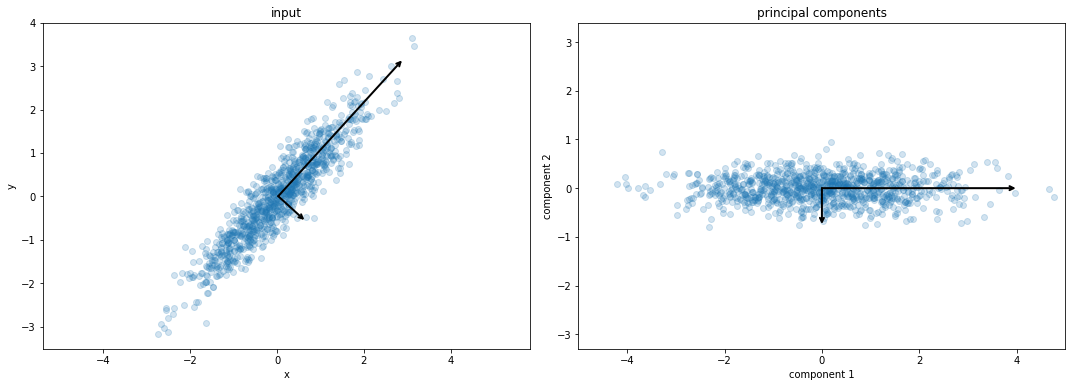

In [46]:
# set up plotting to have two side-by-side figures
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for i in range(2):
    v = vector[i] * 3 * np.sqrt(length[i])
    drawVector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
drawVector([0, 0], [0, -length[1]*10], ax=ax[1])
drawVector([0, 0], [length[0]*2, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1));

Most of what we will use PCA for is dimensionality reduction. Let's see an example of that.

In [47]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1000, 2)
transformed shape: (1000, 1)


Originally, we had two variables. By specifying 1 component, we are asking how well we can reconstruct our data with just the first principal component. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

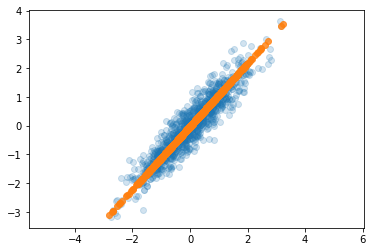

In [48]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The blue points are the original data, while the orange points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.  

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA on images
The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. For this example, we'll use a set of hand-written digits that is part of our sklearn library. We'll first load in the data:

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
np.shape(digits.data)

(1797, 64)

This means that there are 1,797 images in our database, each with 64 pixels. 

Reshape the first image into 8x8 pictures. They are very small, but we can still recognize the numbers.

In [2]:
firstImage = digits.data[]
firstImage = np.reshape()
plt.imshow(, cmap='Greys')

SyntaxError: invalid syntax (<ipython-input-2-d4fa6340c59b>, line 1)

In [6]:
# compute PCA using first two components
pca = PCA(n_components = )  # project from 64 to 2 dimensions
# Fit data to PCA model
projected = pca.fit_transform()
# Print the shape of the original and projected data
print()
print()

SyntaxError: invalid syntax (<ipython-input-6-7cd3d72ffd0c>, line 2)

Now we can project our data onto the first two components to see if the numbers cluster:

In [7]:
plt.scatter( ,c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

SyntaxError: invalid syntax (<ipython-input-7-108dbbb4b3df>, line 1)

## Reconstructing data with limited components
Let's see what our first ten digits look like with only the first two components:

In [8]:
pca = PCA(n_components = )
train = pca.fit()
components = train.transform(digits.data)
projected = train.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
# Loop through data to plot images from the database and the projected images
for i in range():
    # Plotting the digits from the data base
    ax[0, i].imshow(digits.data[i].reshape(8, 8), cmap='Greys')
    # Plot the image projections
    ax[1, i].imshow(, cmap='Greys')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('2-dim\nreconstruction');

SyntaxError: invalid syntax (<ipython-input-8-153ff3cec3b0>, line 1)

## Choosing the right number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

In [11]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

NameError: name 'digits' is not defined

This curve quantifies how much of the total, 64-dimensional variance is contained within the first  $N$ components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.  

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

Using the digits dataset, see what images look like using the first 5, 10, and 20 PCs

In [9]:
# Setting up plotting structure
fig, ax = plt.subplots(4, 10, figsize=(10, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Create list to calculate PCA with different number of components

# Initializing counter for plotting
count = 0
# Outer-loop to compute PCA with different number of components
for j in range():
    # Index principal component list
    
    # Initialize PCA to compute with given number of components
    
    # Fit data to PCA model
    
    # Define the principal components
    
    # Project components into vector
    
    count = count + 1
    # Inner-loop to plot projected images
    for i in range():
        # Plotting the images from the database
        ax[0, i].imshow(digits.data[i].reshape(8, 8), cmap='Greys')
        # Plot the projected images of each PCA
        ax[count, i].imshow(, cmap='Greys')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('5-dim\nreconstruction');
ax[2, 0].set_ylabel('10-dim\nreconstruction');
ax[3, 0].set_ylabel('20-dim\nreconstruction');

SyntaxError: invalid syntax (<ipython-input-9-9bf7fddd0b68>, line 28)

## Representational Similarity Analysis

Representational similarity analysis (RSA) is used to analyze the response similarity between various stimuli in selected regions of the brain. This is often visualized by computing and graphically displaying a **Representational Dissimilarity Matrix (RDM)**. RDM's are calculated by measuring the distance between activity patterns in the brain responding to various stimuli. The distance is measured by using multi-dimensional scaling in which each point is transformed into in a 2-dimensional space, optimizing each of their relative distances to all the other conditions. 

Ths *RSA_labMaterials.mat* file included in this lab is from an article published in the journal *Neuron* and is titled "Matching categorical object representaions in inferior temperoral cortex of man and monkey". In this experiment, the researchers compared the response of a monkey's inferior temperoral cotrex (IT) and a human's IT to 92 images. These images were split up into two main categories (animate and inanimate) and two subcategories each (human body vs human face and natural vs artificial). They recorded the monkey's with electrodes and the human's with an fMRI, and created two RDM's, one for each species.

Their results are in the following figure:

<img src="IT_RDM.jpg" alt="drawing" width="500"/>

#### The dark-blue represents areas where there is a lot of correlation between various stimuli.
#### The dark-red represents areas where there is little correlation between various stimuli.


***
You will attempt to recreate the results of the above paper by using the data stored in the *RSA_labMaterials.mat* file.

A look inside the file:
- *simTruePatterns* is an array containing the multi-dimensional scaling of all the activity patterns by the human participants of the study. 
- *categoryLabels* is an array containing the name of the various categories
- *categoryVectors* is an array which...?

Load in the file using the imported **_loadmat()_** function

In [57]:
# Run the following:
from mat2array import loadmat
RSA_labMaterials = loadmat('RSA_labMaterials.mat')
simTruePatterns = RSA_labMaterials['simTruePatterns']
categoryLabels = RSA_labMaterials['categoryLabels']
categoryVectors = RSA_labMaterials['categoryVectors']

Visualize the *simTruePatterns* and *categoryVectors* matrices in horizontal subplots by using **_plt.imshow_**.

In [10]:
import matplotlib.pyplot as plt
# Your code here
plt.figure(figsize=(7,3))
plt.subplot()
plt.imshow()
plt.subplot()
plt.imshow(, aspect='auto')

SyntaxError: invalid syntax (<ipython-input-10-d58c5dc3378c>, line 7)

Now, calculate the RDM for *simTruePatterns* by using the imported **_pdist_** function.

In [59]:
from scipy.spatial.distance import pdist

distMat = pdist(, metric='correlation')

Note that your calculated RDM is a 1-dimensional array. To visualize it, use the imported function **_squareform()_** to make it a square matrix and then use **_plt.imshow()_** to see it.

In [12]:
from scipy.spatial.distance import squareform

In [13]:
distMat = squareform()
plt.figure()
plt.imshow()

TypeError: squareform() missing 1 required positional argument: 'X'

Great! You have created your first RDM based off of real data.

Next, compare the RDM you created to the RDM's in the figure below.

In [15]:
models = loadmat('92_modelRDMs.mat')
Models = models['Models']
plt.figure(figsize=(10,6))

rdmCube = np.zeros((92,92,7))
count = 0
for i in range(len(Models)):
    model = vars(Models[i])
    RDM = model['RDM']
    name = model['name']
    if name != 'monkeyIT':
        rdmCube[:,:,count] = RDM
        count = count + 1
        plt.subplot(2,4,count)
        plt.title(name)
        plt.imshow(RDM)

NameError: name 'loadmat' is not defined

You can actually find which models contribute most to the RDM that you made from the human IT. Using the same linear regression method as you learned in the Linear Algebra lab, visualize the predicted RDM and the two models containing the most information with respect to your calculated RDM.

In [16]:
from numpy.linalg import inv
# Create y vector by transforming distMat back to a vector
y = squareform(, force='tovector')

# Initialize data space for each RDM model
dataCube = np.zeros() 

for i in range(7):
    # Loop through rdmCube to get each RDM

    # Flatten each RDM to a vector
    
    # Store each vector in dataCube

# Create vector of ones to help with accuracy
A = np.ones()
# Use vstack to concatenate the vector of ones with dataCube... REMEMBER DIMENSIONALITY
dataCube = np.vstack()
# Calculate the inverse of the dataCube multiplied by the transpose of itself
X = inv(np.matmul())
# Mutliply dataCube by the y vector
D = np.matmul(dataCube,y)
# Multiply your X and D matrices to get your beta matrix
B = np.matmul()

# Calculate predicted RDM
yHat = np.matmul(dataCube.T,B)

# Use squareform to create RDM's of the human RDM, predicted RDM, 
# and the two models which influence the human RDM the most.
yHatRDM = squareform(yHat)
model1 = squareform(dataCube[1,:])
model2 = squareform(dataCube[3,:])

# Plotting
plt.figure(figsize=(6,8))
plt.subplot(2,2,1)
plt.imshow(distMat)
plt.title('Human IT')
plt.subplot(2,2,2)
plt.imshow(yHatRDM)
plt.title('Predicted RDM')
plt.subplot(2,2,3)
plt.imshow(model1)
plt.title('The first model: Animacy')
plt.subplot(2,2,4)
plt.imshow(model2)
plt.title('The second model: EVA')

SyntaxError: invalid syntax (<ipython-input-16-99e3d69854c2>, line 3)

Do your results makes sense? Why or why not?

Answer in a comment below:

In [17]:
# Answer:

Now that you have a better idea of what information is primarily found in the human IT, it will be helpful to understand how much information is lost in higher dimensions.

Do a multi-dimensional scaling of the result by using the imported function **_cmdscale_** from **MDS** and plot the eigenvalues.

In [18]:
from MDS import cmdscale
'''
Note: cmdscale returns 2 variables, a Y array and an e array
Y array:  Configuration matrix. Each column represents a dimension.
e array:  Eigenvalues of B. 
'''
Y,e = cmdscale()

plt.figure()
plt.plot()

TypeError: cmdscale() missing 1 required positional argument: 'D'

How do we determine the right number of dimensions?

In [19]:
# Answer:

Look at result represented by the two dimensions (columns of Y).

In [20]:
# Your code here

As you can see, the multi-dimensional scaling represents a cluster of data points, however we have to determine which each group data point corresponds to. The first two columns of the categoryVectors matrix represents the animate vs inanimate categories, with the remaining dimensions corresponding to face, body, natural, and artificial image categories respectively.

In the cell below, plot the animate category in green and the inanimate category in black.

In [21]:
animate, = np.where()
inanimate, = np.where()
plt.figure()
plt.scatter(, c='g')
plt.scatter(, c='k')

NameError: name 'np' is not defined

Next, face, body, natural, and artificial dimensions to see where each specific category is plotted.

In [22]:
face, = np.where()
body, = np.where()
nat, = np.where()
art, = np.where()

# Plotting
plt.figure()
plt.scatter(Y2[face,0], Y2[face,1], c='g')
plt.scatter(Y2[body,0], Y2[body,1], c='y')
plt.scatter(Y2[nat,0], Y2[nat,1], c='purple')
plt.scatter(Y2[art,0], Y2[art,1], c='k')

NameError: name 'np' is not defined

What do these points correspond to?

In [ ]:
# Answer:

How do you interpret the two dimensions?

In [72]:
# Answer:

How bad is the 2D approximation?

In [23]:
distMat2 = pdist(Y2, 'correlation')
distMat2 = squareform()
# Plotting
plt.figure()
plt.subplot(1,2,1)
plt.imshow(distMat)
plt.subplot(1,2,2)
plt.imshow(distMat2)

NameError: name 'pdist' is not defined

How much better can we do with more dimensions?

Run the following code and answer in a comment below what happens when you calculate the RDM with an increasing amount of dimensions.

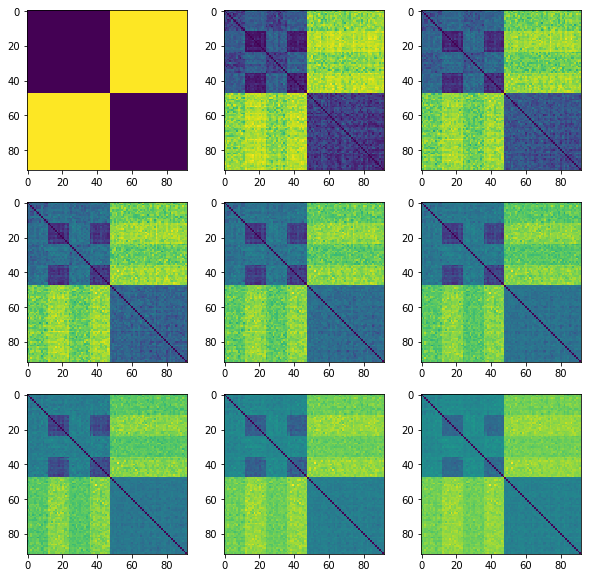

In [79]:
plt.subplots(figsize=(10,10))
count = 1
for dim in range(2,83,10):
    thisY = Y[:,:dim]
    thisMat = pdist(thisY, 'correlation')
    thisMat = squareform(thisMat)
    plt.subplot(3,3,count)
    plt.imshow(thisMat)
    count = count + 1

In [24]:
# Answer:

Now look at the help file on pdist, and see what happens when you use Euclidean distance.

In [25]:
# Answer:

That's all for today, once again, great job!